In [5]:
import numpy as np 
import tensorflow as tf
import keras
import matplotlib

In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #importando o set

In [11]:
x_train, x_train.max() #varia entre 0 a 255, ou seja de preto ao branco respectivamente


(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

Text(0.5, 1.0, 'Classe3')

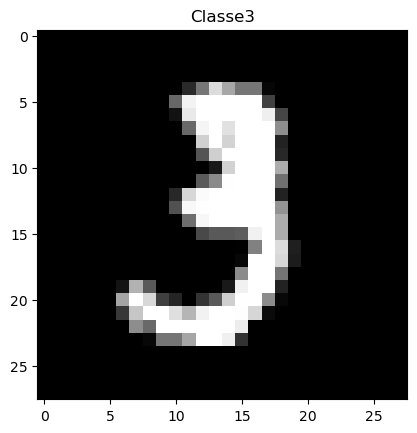

In [13]:
plt.imshow(x_train[10], cmap="gray") #pegando uma imagem especfica com uma formatacao de melhor visualizacao, o gray
plt.title("Classe"+str(y_train[10])) #pegando a classe respectiva

In [15]:
#execucao de pre processamento para ficar no formato compativel a rede neural
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) #primeira posicao a quantidade de imagens e depois o 28x28 e no final add o nuemro 1, em escala de cinza(qquantidade de canais da imagens, RBG)

In [17]:
#execucao de pre processamento para ficar no formato compativel a rede neural
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) #primeira posicao a quantidade de imagens e depois o 28x28 e no final add o nuemro 1, em escala de cinza(qquantidade de canais da imagens, RBG)

In [21]:
x_train = x_train.astype("float32") #mudando o tipo da variavel
x_test = x_test.astype("float32")
x_train /= 255 #dividir cada valor pelo valor max
x_test /= 255 #dividir cada valor pelo valor max
x_train.max(), x_train.min() #valores entre 0 e 1 apos dividir por 255

(1.0, 0.0)

In [23]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [25]:
rede_neural = Sequential() #camada de entrada
rede_neural.add(InputLayer(shape = (28,28,1))) #28 pixels de altura por 28 de largura

rede_neural.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))#camada de convolucao, com o valor padrao de 32 filtros(kernels), depois o tamanho da matriz
rede_neural.add(BatchNormalization())  #camada de normalizacao
rede_neural.add(MaxPooling2D(pool_size = (2,2)))#camada de max pooling

rede_neural.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))#camada de convolucao, com o valor padrao de 32 filtros(kernels), depois o tamanho da matriz
rede_neural.add(BatchNormalization()) # camada de normalizacao
rede_neural.add(MaxPooling2D(pool_size = (2,2)))#camada de max pooling

#adcionei mais uma camada para analisar o resultado
rede_neural.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))#camada de convolucao, com o valor padrao de 32 filtros(kernels), depois o tamanho da matriz
rede_neural.add(BatchNormalization()) # camada de normalizacao
rede_neural.add(MaxPooling2D(pool_size = (2,2)))#camada de max pooling

rede_neural.add(Flatten()) #camada flatten

rede_neural.add(Dense(units = 128, activation = "relu")) 
rede_neural.add(Dropout(0,2))
rede_neural.add(Dense(units = 128, activation = "relu")) 
rede_neural.add(Dropout(0,2))
rede_neural.add(Dense(units=10, activation = "softmax"))#camada de saida

In [27]:
rede_neural.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,226 (161.04 KB)

 Trainable params: 41,034 (160.29 KB)

 Non-trainable params: 192 (768.00 B)

In [29]:
rede_neural.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [31]:
rede_neural.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))
#total de 469, sendo resultada da divisao de 60000 dados dividido por 128

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.8446 - loss: 0.5118 - val_accuracy: 0.9659 - val_loss: 0.1280
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9782 - loss: 0.0695 - val_accuracy: 0.9764 - val_loss: 0.0754
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9850 - loss: 0.0494 - val_accuracy: 0.9795 - val_loss: 0.0676
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9881 - loss: 0.0391 - val_accuracy: 0.9788 - val_loss: 0.0635
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9896 - loss: 0.0326 - val_accuracy: 0.9871 - val_loss: 0.0442


In [32]:
resultado = rede_neural.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9845 - loss: 0.0547


In [33]:
resultado #erro x accuracy, piorando com o exemplo anterior, demonstrando que as vezes nao precisa de uma rede neural complexa

[0.044234469532966614, 0.9871000051498413]